<a href="https://colab.research.google.com/github/tushar2411/Almabetter-Data-Science/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis On Play Store App Reviews**

###In this Data Analysis Project, I will explore and visualize and answer the questions which can generally come to our mind. This is my first Capstone Project in Module-1 provided by Almabetter. I will apply libraries and techniques that whatever i have learned and gain many skills while persuing this course.

###Let's take a look at the data, which consists of two files:

### ***playstore data.csv***: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
### ***user_reviews.csv***: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.
### Before jumping into the data's provided, let me first explain you about the EDA analysis.

# **What is Exploratory Data Analysis?**
### Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets for patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset and summarize their main characteristics, often employing data visualization methods. It is an important step in any Data Analysis or Data Science project. It helps determine how best to manipulate data sources to get the answers you need.

### EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better and make it more attractive and appealing.

## The following are the various steps involved in the EDA process:

### 1) **Problem Statement** - We will brainstorm and understand the given data set. We will study the attributes present in it and try to do a philosophical analysis about their meaning and importance for this problem.
### 2) **Hypothesis** - Upon studying the attributes present in the data base, we will develop some basic hypothesis on which we can work and play with the data to look for the varied results which we can get out of it.
### 3) **Univariate Analysis** - It is the simplest form of analyzing the data. In this we would initially pick up a single attribute and study it in and out. It doesn't deal with any sort of co-relation and it's major purpose is to describe. It takes data, summarizes that data and finds patterns in the data.
### 4) **Bivariate Analysis** - This analysis is related to cause and the relationship between the two attributes. We will try to understand the dependency of attributes on each other.
### 5) **Multivariate Analysis** - This is done when more than two variables have to be analyzed simultaneously.
### 6) **Data Cleaning** - We will clean the dataset and handle the missing data, outliers and categorical variables.
### 7) **Testing Hypothesis** - We will check if our data meets the assumptions required by most of the multivariate techniques.

## **So lets start to explore the data** -:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading the CSV file
playSdata = pd.read_csv('/content/drive/MyDrive/Alambetter/Capstone Project 1/Play Store App Review Analysis/Play Store Data.csv')

In [4]:
playSdata.shape

(10841, 13)

In [5]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
playSdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **Let us first define what information the columns contain based on our inspection.**

### play_store dataframe has `10841` `rows` and `13 columns.` The 13 columns are identified as below:
1. **App** - It tells us about the name of the application with a short description (optional).

2. **Category** - It gives the category to the app.

3. **Rating** - It contains the average rating the respective app received from its users.

4. **Reviews** - It tells us about the total number of users who have given a review for the application.

5. **Size** - It tells us about the size being occupied the application on the mobile phone.

6. **Installs** - It tells us about the total number of installs/downloads for an application.

7. **Type** - IIt states whether an app is free to use or paid.

8. **Price** - It gives the price payable to install the app. For free type apps, the price is zero.

9. **Content Rating** - It states whether or not an app is suitable for all age groups or not.

10. **Genres** - It tells us about the various other categories to which an application can belong.

11. **Last Updated** - It tells us about the when the application was updated.

12. **Current Ver** - It tells us about the current version of the application.

13.**Android Ver** - It tells us about the android version which can support the application on its platform.

#**Data Cleaning -:**

### The four features that we will be working with most frequently henceforth are Installs, Size, Reviews and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.



###We can wee that some column names are having spaces to their names. So we'll replace them with "_" so it will be avoid case sensitivity while analyzing the data

In [8]:
playSdata.columns = [col.replace(' ','_') for col in list(playSdata.columns)]

In [9]:
playSdata.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [10]:
playSdata.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
data1  = playSdata.head()
data2  = playSdata.tail()
concatData = pd.concat([data1,data2],axis=0,ignore_index=True)

In [12]:
concatData

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## **Handling the NaN values in the Play store data -:**

In [13]:
#rows containg null values
playSdata[playSdata['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


###We can see in below graph now ratings are under 5

In [14]:
playSdata[playSdata['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
playSdata.drop(10472,inplace=True)

In [16]:
playSdata[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


###We will remove the null in columns which are empty

In [17]:
print(type(playSdata['Rating']))

<class 'pandas.core.series.Series'>


In [18]:
threshold = len(playSdata) * 0.1
threshold

1084.0

In [19]:
playSdata.dropna(thresh=threshold,axis=1,inplace=True)

In [20]:
print(playSdata.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          2
dtype: int64


In [21]:
playSdata.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


###In Rating column we have some null values. To remove these values we'll calculate median of this column by creating function

In [22]:
def cal_median(series):
  return series.fillna(series.median())

In [23]:
playSdata.Rating = playSdata['Rating'].transform(cal_median)

In [24]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       8
Android_Ver       2
dtype: int64

###Now we will apply mode for same the 'Current_Ver,Android__Ver, Type'

In [25]:
print(playSdata['Type'].mode())

0    Free
dtype: object


In [26]:
print(playSdata['Current_Ver'].mode())

0    Varies with device
dtype: object


In [27]:
print(playSdata['Android_Ver'].mode())

0    4.1 and up
dtype: object


###Now we'll fill these categorial values with mode

In [28]:
playSdata['Type'].fillna(str(playSdata['Type'].mode().values[0]),inplace=True)

In [29]:
playSdata['Current_Ver'].fillna(str(playSdata['Current_Ver'].mode().values[0]),inplace=True)

In [30]:
playSdata['Android_Ver'].fillna(str(playSdata['Android_Ver'].mode().values[0]),inplace=True)

In [31]:
playSdata['Content_Rating'].fillna(str(playSdata['Content_Rating'].mode().values[0]),inplace=True)

In [32]:
playSdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

###We can also see that above information about data there is a Price column which has all numeric float values plus there is '$' sign we will remove it and convert into float values.'

In [33]:
playSdata['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
playSdata['Price'] = playSdata['Price'].apply(lambda row: str(row).replace('$','') if '$' in str(row) else str(row))

playSdata['Price'] = playSdata['Price'].apply(lambda row: float(row))

playSdata['Price'].sample(20)

10      0.00
3794    0.00
9121    0.00
9442    0.00
6291    0.00
6383    0.00
9265    0.00
8787    4.99
1264    0.00
1847    0.00
8998    0.00
4681    0.00
745     0.00
9636    0.00
6205    9.99
2048    0.00
357     0.00
8107    0.00
6048    0.00
6677    0.00
Name: Price, dtype: float64

###Again we can see that in Reviews column there are object type but these are numeric values. So, we'll convert them completely in Numerical data.

In [35]:
playSdata['Reviews'] =pd.to_numeric( playSdata['Reviews'],errors='coerce')

###Also in "Installs" there "+" and "," sign after the value. So, it also to be done as same as "Price"

In [36]:
playSdata['Installs'].sample(5)

2018      5,000,000+
2219     10,000,000+
10100    10,000,000+
1935      5,000,000+
9787        100,000+
Name: Installs, dtype: object

In [37]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace("+","") if "+" in str(row) else str(row))

playSdata['Installs'] = playSdata['Installs'].apply(lambda row: str(row).replace(",","") if "," in str(row) else str(row))

In [38]:
playSdata['Installs'] = playSdata['Installs'].apply(lambda row: int(row))
playSdata['Installs'].sample(5)

5790      100000
6017       10000
6033      100000
1281    10000000
2845    10000000
Name: Installs, dtype: int64

###For size also "M" and "K" is appearing, Which "M" means MB and "k" means KB we'll remove it and convert it as numeric values.

In [39]:
# playSdata['Size'].unique()

In [40]:
def reamove(a):
  """This function takes a string and replace the following characters if present, '+', ',' ,'$', 'M', 'k', 'NaN'"""
  if "M" in a:
    # We Are Replacing "M" and multiplying with 1000000
    a = str(int(float(a.replace("M",""))*1000000))
  if "k" in a:
    # We Are Replacing "k" and multiplying with 1000
    a = str(int(float(a.replace("k",""))*1000))
  if "NaN" in a:
    a = "0"
  else:
    pass
  return a


In [41]:
# Changing the size column values in numeric values
playSdata['Size'] = playSdata['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
playSdata['Size'] = pd.to_numeric(playSdata['Size'].map(lambda x: reamove(x)))

### Visualization of distribution of `Size` using displot and detecting the outliers through boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


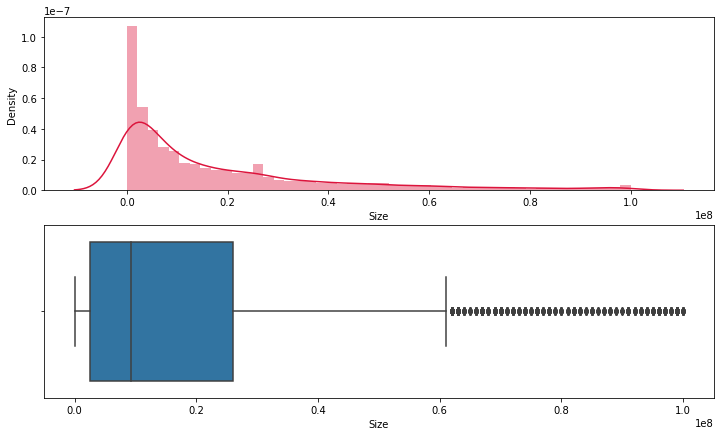

In [42]:
# Distplot
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(playSdata[playSdata['Size'] != 'Varies with device']['Size'], color='crimson', ax=ax[0]);
sns.boxplot(x='Size',data=playSdata, ax=ax[1]);

### It is clear from the visualizations that the data in the Size column is skewed towards the right.

### Also, we see that a vast majority of the entries in this column are of the value Varies with device, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

### We have successfully converted all the valid entries in the Size column to a single unit of measure (MB) and the datatype from string to float.

##Now we will handle the duplicates in App column. Because in column app having number of duplicates which are not necessary in data.

In [43]:
playSdata['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

##From Above we will remove these duplicates from App

In [44]:
playSdata.drop_duplicates(subset='App',inplace=True)

## Changing the datatype of the `Last Updated` column from string to datetime.

In [45]:
# Pandas to_datetime() function applied to the values in the last updated column helps to convert string Date time into Python Date time object.

playSdata["Last_Updated"] = pd.to_datetime(playSdata['Last_Updated'])
playSdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


##Finally, I have clean the all data whatever was garbage in our data. Now will see the summary stats after cleaning our data.

In [46]:
playSdata.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,1.780444e+07,7.777507e+06,1.099299
std,0.496397,1.831320e+06,2.149524e+07,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000e+06,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [47]:
playSdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   int64         
 5   Installs        9659 non-null   int64         
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content_Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last_Updated    9659 non-null   datetime64[ns]
 11  Current_Ver     9659 non-null   object        
 12  Android_Ver     9659 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 1.0+ MB


In [48]:
playSdata.shape

(9659, 13)

## We have successfully converted the datatype of the values in the Reviews column from string to int.

## Now that we have handled the errors and NaN values in the `playstoredata.csv` file, lets do the same for the userreviews.csv file.

# **Now We will Explore `User review` Dataframe**

## Importing Data

In [49]:
user_review = pd.read_csv('/content/drive/MyDrive/Alambetter/Capstone Project 1/Play Store App Review Analysis/User Reviews.csv')

In [50]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [51]:
user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [52]:
print(user_review.columns)
rows = user_review.shape[0]
columns = user_review.shape[1]
print(f'Our dataframe has {rows} rows and {columns} columns')

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
Our dataframe has 64295 rows and 5 columns


### **First lets have a look that what column names mean to be identified -:**


### user_reviews dataframe has `64295` rows and `5` columns. The `5` columns are identified as follows:



*  **App:** Contains the name of the app with a short description (optional).
Translated_Review: It contains the English translation of the review dropped by the user of the app.
*   **Sentiment:** It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.

*   **Sentiment_Polarity:** It gives the polarity of the review. Its range is `[-1,1]`, where 1 means ‘Positive statement’ and `-1` means a ‘Negative statement’.
*   **Sentiment_Subjectivity:** This value gives how close a reviewers opinion is to the opinion of the general public. Its range is` [0,1]`. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.





##**Handling the NaN values in data-:**

In [53]:
def Urinfo():
  temp1=pd.DataFrame(index=user_review.columns)
  temp1["datatype"]=user_review.dtypes
  temp1["not null values"]=user_review.count()
  temp1["null value"]=user_review.isnull().sum()
  temp1["% of the null value"]=user_review.isnull().mean().round(4)*100
  temp1["unique count"]=user_review.nunique()
  return temp1
Urinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


###***From above info we can see that -:***


The number of null values are:
* **Translated_Review** has `26868` null values which contributes **`41.79%`** of the data.
* **Sentiment** has `26863` null values which contributes **`41.78%`** of the data.
* **Sentiment_Polarity**  has `26863` null values which contributes **`41.78%`** of the data.
* **Sentiment_Subjectivity** has `26863` null values which contributes **`41.78%`** of the data.


### There are lot of null values we have to handle. Before handling we will see how to handle the data by analyze it first.

In [54]:
user_review[user_review['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


### From above we can can say that the Apps which have not mentioned reviews they are added with `NaN` values for all columns excluding `App` column

In [55]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.
user_review[user_review['Translated_Review'].isnull() & user_review['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the `Sentiment`, `sentiment ploarity` and `sentiment subjectivity` of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted all togather.

In [56]:
# Deleting the rows containing NaN values
user_review = user_review.dropna()
user_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [57]:
user_review.shape

(37427, 5)

### There are a total of `37427` rows in the updated dataframe.

### Hence we have taken care of all the NaN values in the dataframe.

### **Lets inspect the updated dataframe**

#**Exploratory Data Analysis (EDA)**

##So, let's begin by importing the `matplolib.pyplot` and `seaborn` and also we will fix the plot size, font size and all.

In [58]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### **1) What is Correlation between PlayStore data and user reviews data ?**

In [59]:
# first check the correlation in playSdata
playSdata.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050207,0.027380,0.034307,-0.018662
Reviews,0.050207,1.000000,0.037879,0.625165,-0.007598
Size,0.027380,0.037879,1.000000,-0.007477,-0.015053
Installs,0.034307,0.625165,-0.007477,1.000000,-0.009405
Price,-0.018662,-0.007598,-0.015053,-0.009405,1.000000


### we will use heatmap to see correlation for both datas

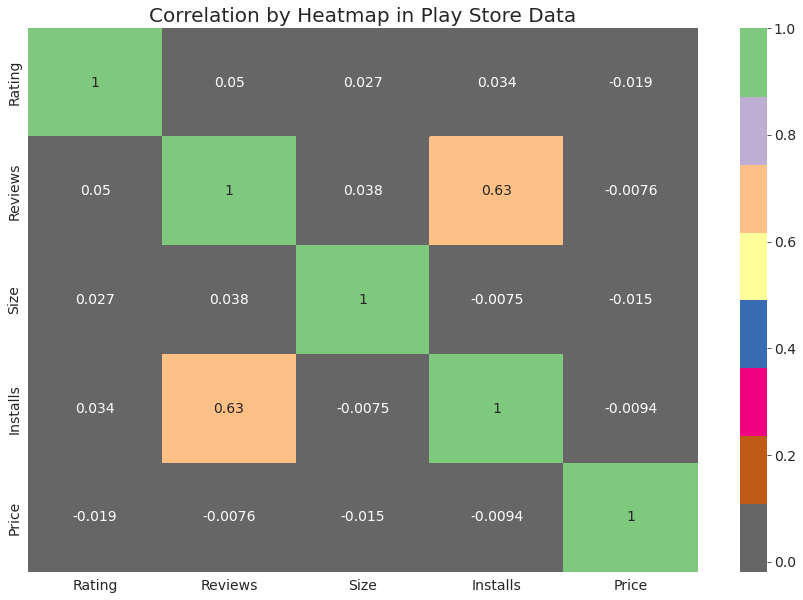

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(playSdata.corr(),annot=True, cmap='Accent_r')
plt.title("Correlation by Heatmap in Play Store Data",size='20');



###    -> There is a strong positive correlation between the `Reviews` and `Installs` column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of `reviews` dropped by the users.

###   -> The Prices slightly negatively correlated with the Rating, `Reviews`, and `Installs`. This means that as the prices of the app increases, the average rating, total number of `reviews` and `Installs` fall slightly.


###   -> The Rating is slightly positively correlated with the `Installs` and Reviews column. This indicates that as the the average user rating increases, the app `installs` and number of `reviews` also increase.






### ***okay, Now lets check correlation between both datas***

In [61]:
from pandas.core.reshape.merge import merge
merge_datas = pd.merge(playSdata, user_review, on='App', how='inner')

In [62]:
def merge_info():
  temp = pd.DataFrame(index=merge_datas.columns)
  temp['DataType'] = merge_datas.dtypes
  temp['counted nulls'] = merge_datas.count()
  temp['NaN values'] = merge_datas.isnull().sum()
  temp['% of NaN values'] = merge_datas.isnull().mean()
  temp['unique_count'] = merge_datas.nunique() 
  return temp
merge_info()

,DataType,counted nulls,NaN values,% of NaN values,unique_count
App,object,35929,0,0.0,816
Category,object,35929,0,0.0,33
Rating,float64,35929,0,0.0,22
Reviews,int64,35929,0,0.0,807
Size,int64,35929,0,0.0,167
Installs,int64,35929,0,0.0,12
Type,object,35929,0,0.0,2
Price,float64,35929,0,0.0,9
Content_Rating,object,35929,0,0.0,5
Genres,object,35929,0,0.0,67


In [63]:
merge_datas.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.056184,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.153914,0.564256,-0.020591,-0.080021,-0.009315
Size,0.056184,0.153914,1.000000,-0.002687,0.015257,-0.103308,0.016068
Installs,0.020145,0.564256,-0.002687,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,0.015257,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.103308,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.016068,-0.006307,0.003182,0.259668,1.000000


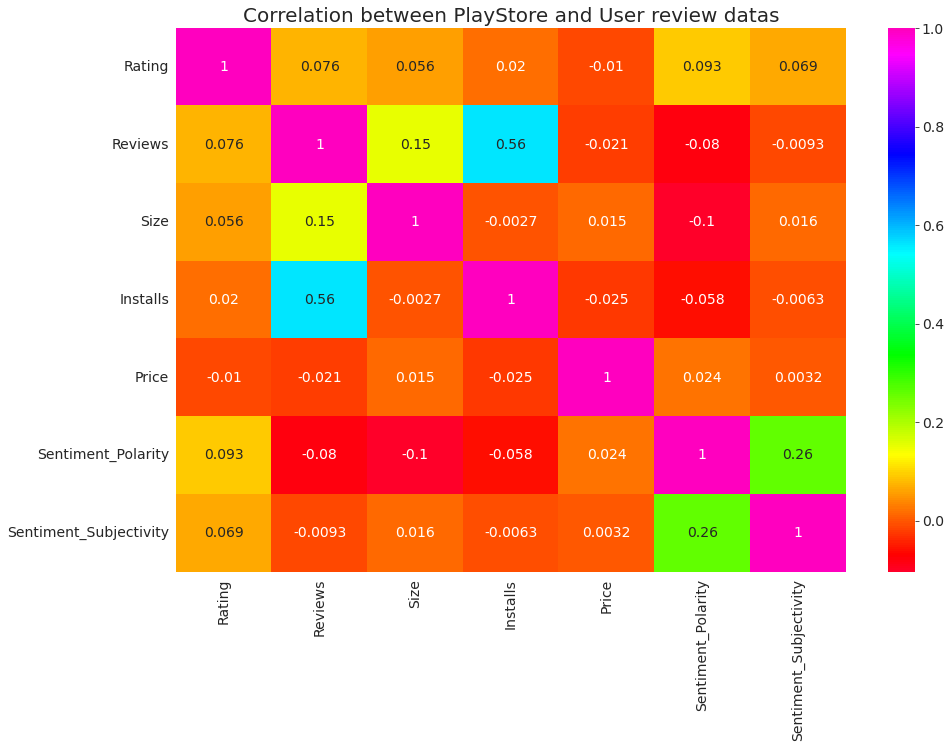

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(merge_datas.corr(),annot=True,cmap='gist_rainbow')
plt.title("Correlation between PlayStore and User review datas",size=20);

In [65]:
merge_datas = merge_datas.dropna(subset=['Sentiment', 'Translated_Review'])
merge_datas.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


##we will get insights and learn the trends, pattern and answers of each questions which we are created to explore the data

### **2) Which category of Apps from the Content Rating column are found more on playstore ?**


In [66]:
playSdata['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

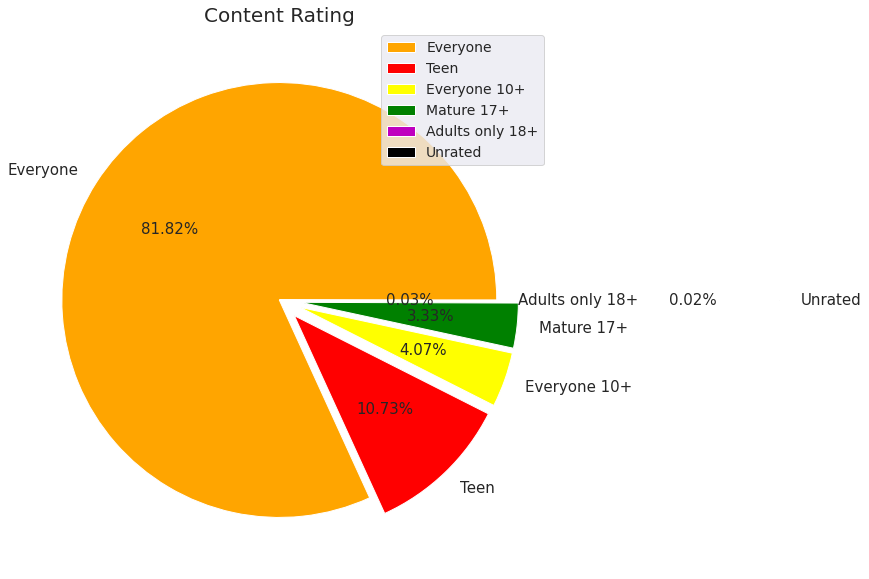

In [67]:
# Content rating of the apps
data = playSdata['Content_Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['orange', 'r', 'yellow', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend();

we can see above that `82%` Ratings are given by `Everyone`. We can assume that least are having age restrictions to use some apps

###**3) Can we see what are the pinnacle classes withinside the play store, which includes the best wide variety of apps by Category?**

In [68]:
y = playSdata['Category'].value_counts().index
x = playSdata['Category'].value_counts()
x_range = []
y_range = []
for i in range(len(x)):
    x_range.append(x[i])
    y_range.append(y[i])

###Here We have defined x axis and y axis

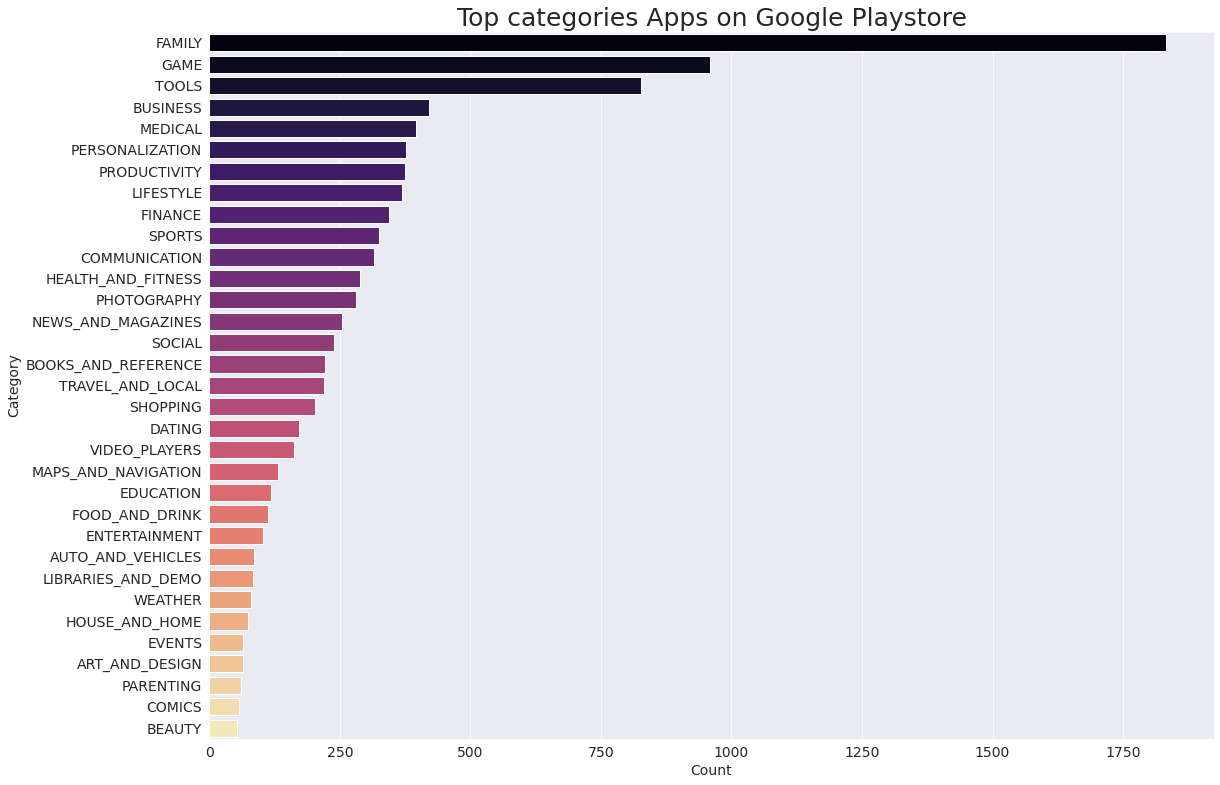

In [69]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = x_range, y = y_range, palette= "magma")
graph.set_title("Top categories Apps on Google Playstore", fontsize = 25);

###from above plot we can see that there are almost 33 categories. In this plot topmost are `FAMILY` and `GAMES` and least are `COMICS` and `BEAUTY` Category are present.

##**4) In dataframe of PlayStore how many percentage of apps are paid and how many percentage of apps are free ?**

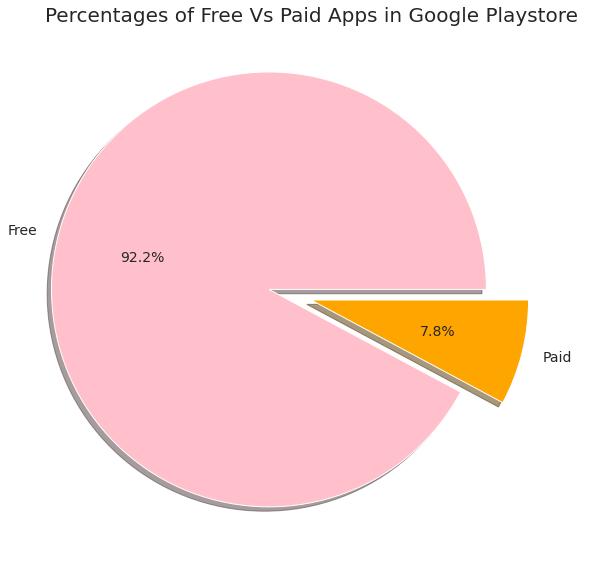

In [70]:
plt.figure(figsize=(10,10))
labels = playSdata['Type'].value_counts(sort = True).index
sizes = playSdata['Type'].value_counts(sort = True)
colors = ["pink","orange"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentages of Free Vs Paid Apps in Google Playstore',size = 20)
plt.show()

###In above Pie Chart We can see that in playstore there are almost `92.8%` are Free Apps and least are `7.8%`

###**5) Which category having the top most installed Apps ?**

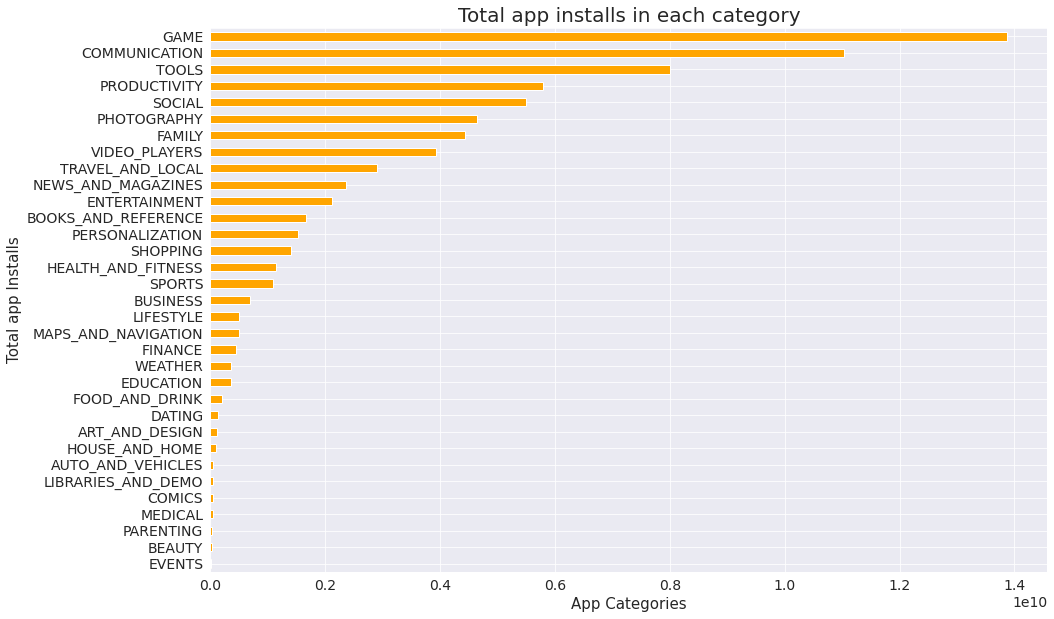

In [71]:
# total app installs in each category of the play store

a = playSdata.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'orange', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20);

This plot tell us that categories like `Game`, `Communication`, `Tools`, `Productivity`, `Social` these 5 has most installs in playstore.

###**6) Which are the `Apps` Having the highest `Reviews` ?**

In [72]:
Highest_review_apps = playSdata.sort_values(by="Reviews",ascending=False)

In [73]:
Highest_review_apps.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2544,Facebook,SOCIAL,4.1,78158306,0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,0,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-07-15,10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,0,500000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,0,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,0,500000000,Free,0.0,Everyone,Tools,2018-08-04,4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97000000,100000000,Free,0.0,Everyone 10+,Strategy,2018-06-27,2.3.2,4.1 and up


###From above we can see that Apps like `Facebook,whatsapp,messenger,instagram` and `Clean Master- Space Cleaner & Antivirus` having highest number of Reviews given by users.

## **7) What is the average Ratings of Apps ?**

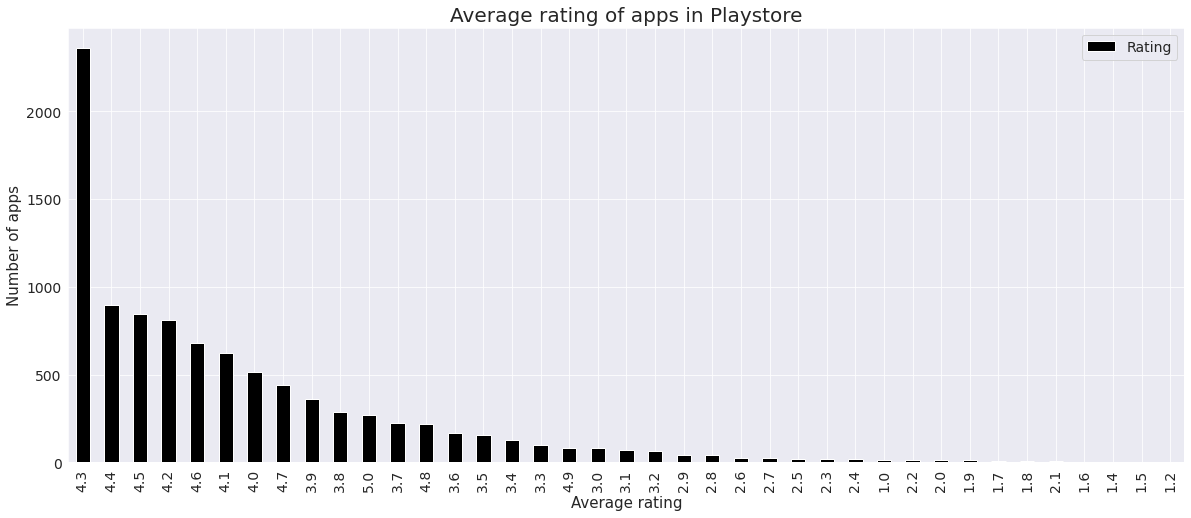

In [74]:
# Average app ratings

playSdata['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'k' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend();

###*Above the conclusion is that most of the people have given top Ratings between `3.5 to 4.8`*

*   *`4-5`: Top rated*
*   *`3-4`: Above average*

*   *`2-3`: Average*
*   *`1-2`: Below average*





## We can see above filters in rating by creating new column

In [75]:
# defining the function to group the ratings as per avove
def grp_rating(val):
  '''this function helps to categorise the Ratings from 1 to 5'''
  if val>4:
    return "Top rated"
  elif val>3 and val<4:
    return "Above average"
  elif val>2 and val<3:
    return "Average"
  else:
    return "Below Average"

### Now we will create new column `Rating_group` and apply this above function to column

In [76]:
playSdata['Rating_group'] = playSdata['Rating'].apply(lambda x: grp_rating(x))

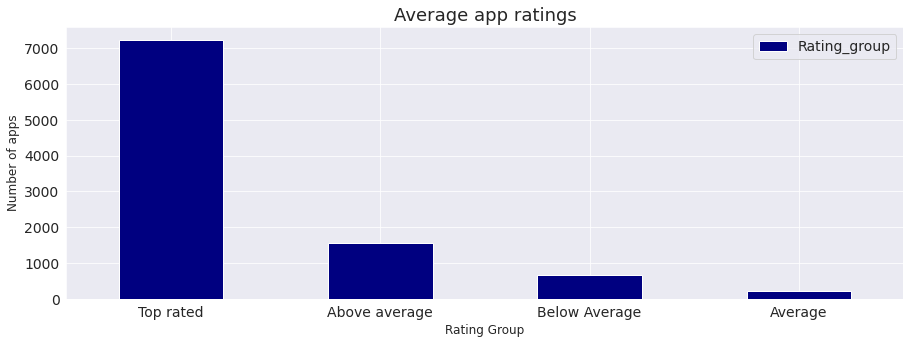

In [77]:
# Average app ratings 
playSdata['Rating_group'].value_counts().plot.bar(figsize=(15,5), color = 'navy')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.legend()

##**8) what are the charges of apps that are paid type ?**

In [78]:
# creating dataframe which contains only paid apps
paidType=playSdata[playSdata['Type']=='Paid']

Text(0, 0.5, 'Frequency')

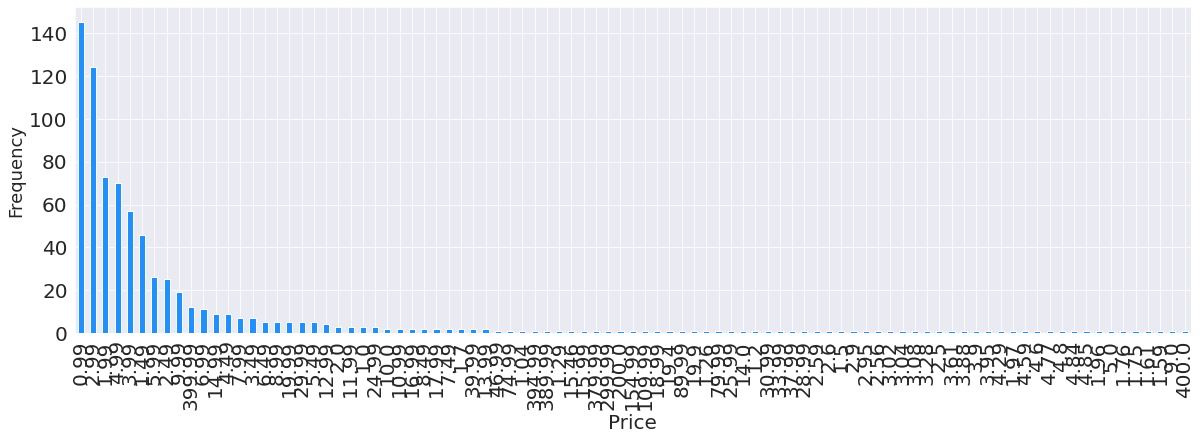

In [94]:
# Number of apps that can be installed at a particular price 

paidType.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'dodgerblue');
plt.ylabel('Frequency',fontsize='18')

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from `USD 0.99` to `USD` `400`.

In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

This is given by:

`Revenue generated through installs = (Number of installs)x(Price to install the app)`

***Lets define a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.***

In [80]:
# Creatng a new column 'Revenue' in paid_df
paidType['Revenue'] = paidType['Installs']*paidType['Price']
paidType.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Rating_group,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Top rated,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Top rated,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Below Average,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,0,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Top rated,39900.0
477,Calculator,DATING,2.6,57,6200000,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Average,6990.0


In [81]:
# Top app in the paid category

paidType[paidType['Revenue'] == paidType['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Rating_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,69900000.0


In [82]:
# Top 10 paid apps in the play store
top10paid_apps=paidType.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

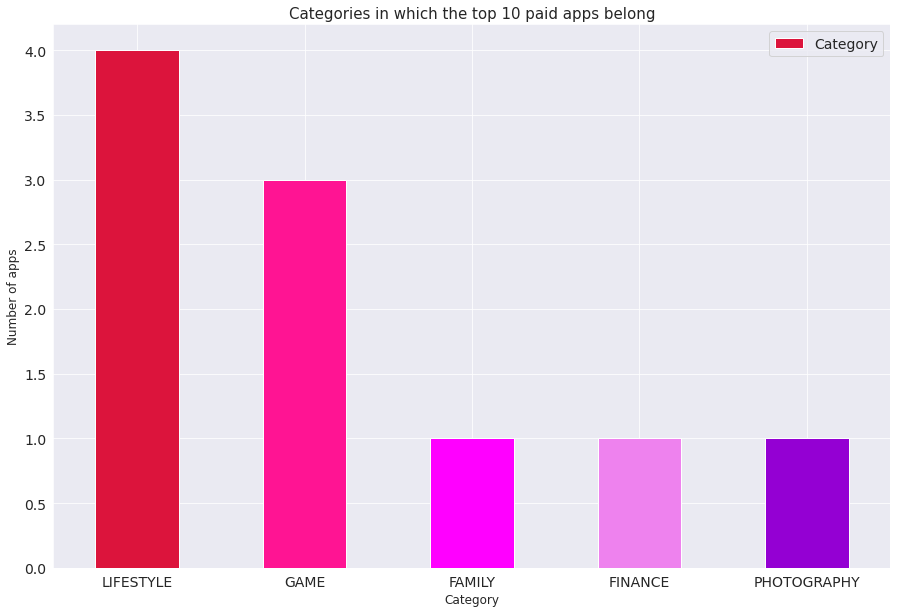

In [83]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,10), color= ["crimson", "deeppink", "fuchsia", "violet", "darkviolet"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


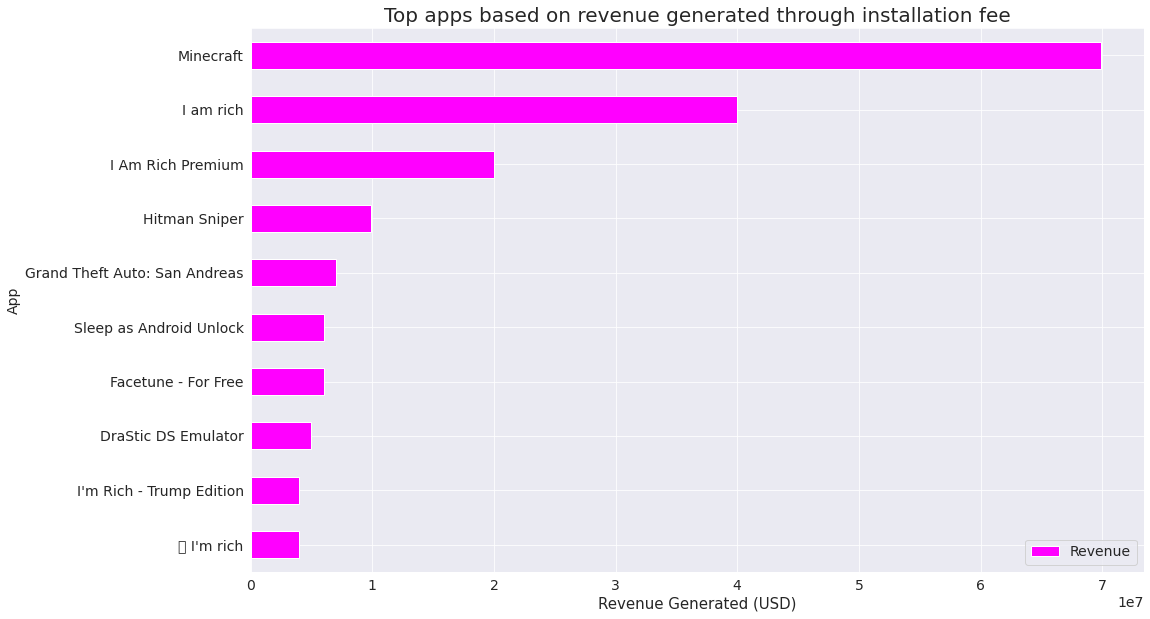

In [84]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='fuchsia')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend();

In [85]:
# Paid apps with the highest number of installs
paidType[paidType['Revenue'] == paidType['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Rating_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,69900000.0


###Finally, we can plot the graph and find out which are the apps with the highest number of earnings.

##Top 10 Earning Apps are below in Google -:



```
1)  Minecraft	
2)	I am rich
3)	I Am Rich Premium	
4)	Hitman Sniper	
5)	Grand Theft Auto: San Andreas	
6)	Facetune - For Free
7)	Sleep as Android Unlock	
8)	DraStic DS Emulator	
9)	I'm Rich - Trump Edition
10)	💎 I'm rich
```



# **Data Visualization Based on Users Review -:**

## **1) What is the Percentage of `Sentiment Reviews`?**

In [86]:
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

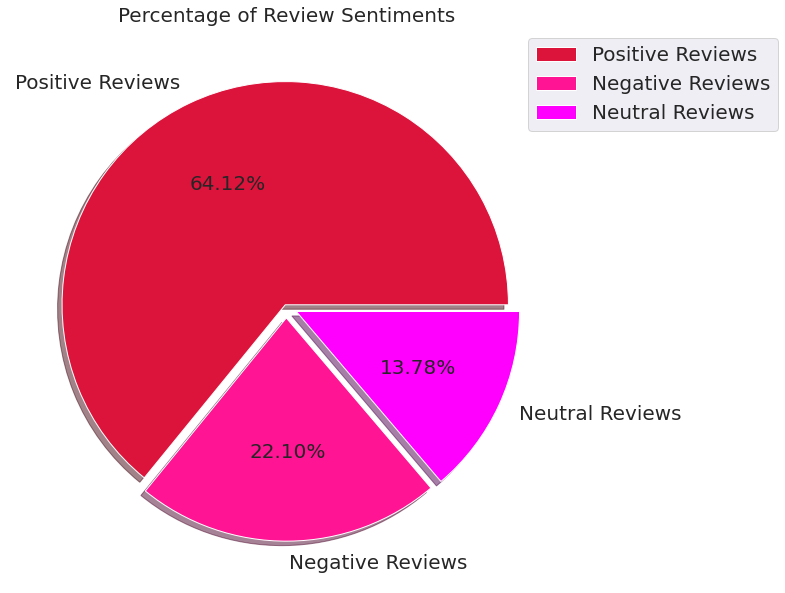

In [87]:
num_sentiment = list(user_review['Sentiment'].value_counts())
labels = ['Positive Reviews','Negative Reviews','Neutral Reviews']
colors = ['crimson','deeppink','fuchsia']
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(num_sentiment, labels=labels, explode=[0.01, 0.05, 0.05],colors=colors, shadow=True, autopct='%.2f%%')
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

### ***Percentage of Review Sentiments-:***


1.   *Positive Reviews* = `64.12%`
2.   *Negative Reviews* = `22.10%`
3.   *Neutral Reviews* = `13.78%`






## **2) Which Apps are having highest number of Positivie Reviews ?**

In [88]:
positive_ = user_review[user_review['Sentiment'] == 'Positive']
positive_

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


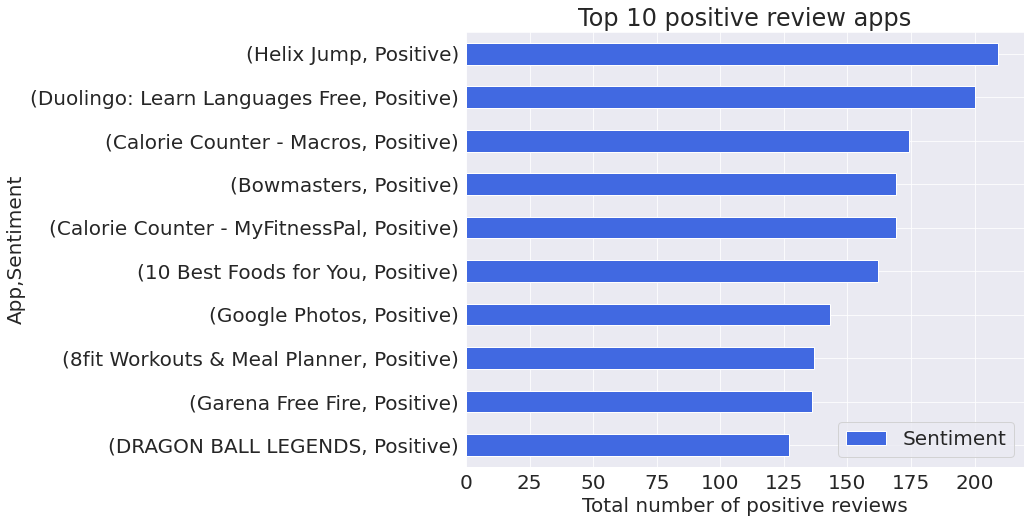

In [89]:
positive_.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='royalblue').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend();

## **3) Which Apps are having highest number of Negative Reviews ?**

In [90]:
negative_ = user_review[user_review['Sentiment']=='Negative']
negative_

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


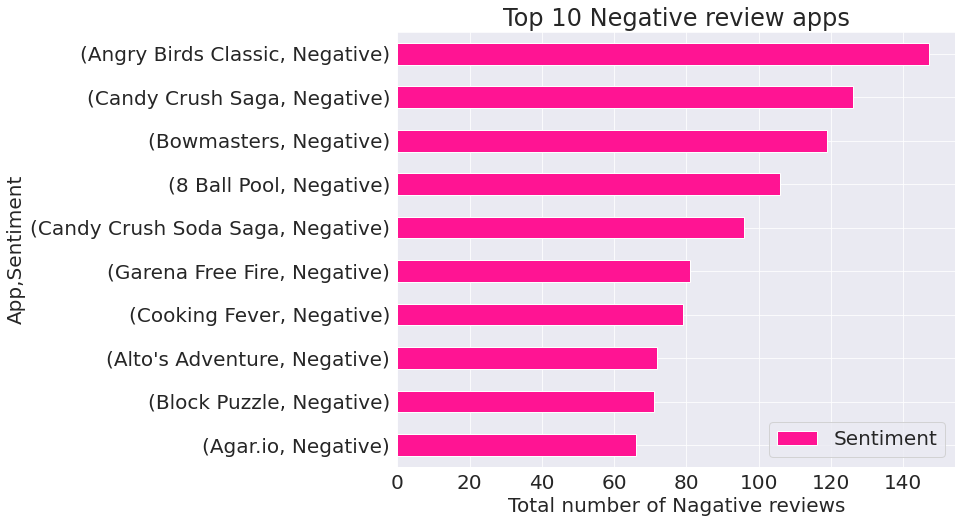

In [91]:
negative_.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(10,8),color='deeppink').invert_yaxis()
plt.title("Top 10 Negative review apps")
plt.xlabel('Total number of Nagative reviews')
plt.legend();

## **4) Is sentiment_subjectivity proportional to sentiment_polarity ?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


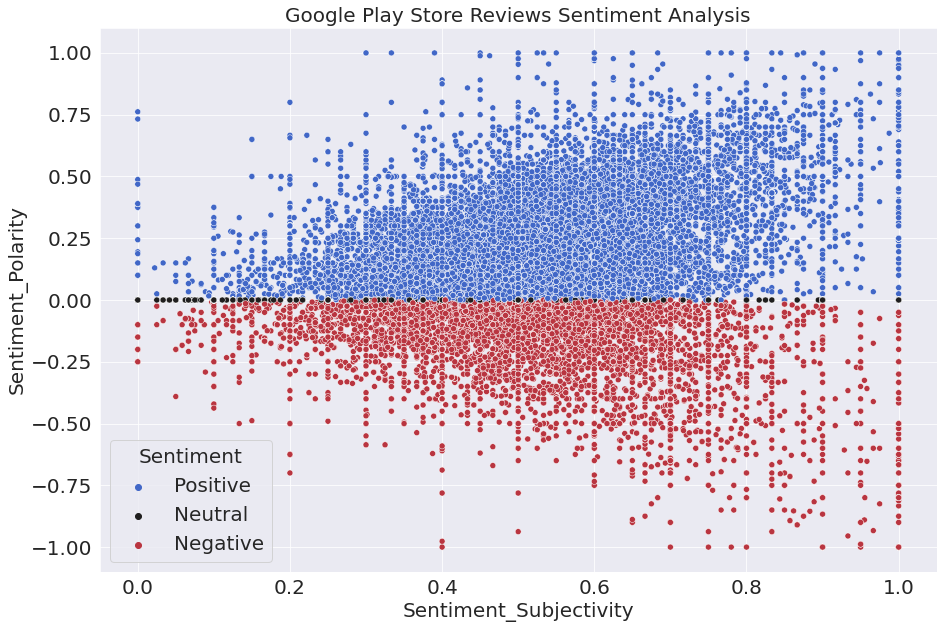

In [92]:
# scatterplot of sentiment polarity and sentiment subjectivity
plt.figure(figsize=(15, 10))
sns.scatterplot(user_review['Sentiment_Subjectivity'], user_review['Sentiment_Polarity'],
                hue = user_review['Sentiment'], edgecolor='white', palette="icefire")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show();

### From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low

# **▶Inferences and Conclusion -:**
## After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.*
##*In this project of analyzing play store applications, we have worked on several parameters which would help Google PlayStore to do well in launching their apps on the play store.

# ***Play Store need to focus more on ⬇***



###1.   Focusing more on content available for Everyone will increase the chances of getting the highest installs.
###2.   Most of the apps are Free, so focusing on free app is more important.

###3.   Developing apps related to the least categories as they are not explored much. Like events and beauty.
###4.   They need to keep in mind that the sentiments of the user keep varying as they keep using the app, so they should focus more on users needs and features.





>*Category with the highest average app installs: `Game`*

>*Percentage of apps that are top rated = `~80%`*

>*Percentage of free apps = `~92%`*

>*Percentage of apps with no age restrictions = `~82%`*

>*Most competitive category: `Family`*

>*Family, Game and Tools are top three categories having `1906`, `926` and `829 `app count.*

>*Tools, Entertainment, Education, Buisness and Medical are top Genres.*

>*There are `20` free apps that have been installed over a billion times.*

>*Minecraft is the only app in the paid category with over `10M` installs. This app has also produced the most revenue only from the installation fee.*

>*Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.*

>*Overall sentiment count of merged dataset in which Positive sentiment count is `64%`, Negative `22%` and Neutral `13%.`*

**1.Rating**

Most of the apps have rating in between 4 and 5.


Most numbers of apps are rated at 4.3


Categories of apps have more than 4 average rating

 **2.Size**

Maximum number of applications present in the dataset are of small size.

**3.Installs**

Majority of the apps come into these three categories, Family, Game, and Tools.

Maximum number of apps present in google play store come under Family, Game and tools but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Game, Communication, Productivity and Social.

Facebook, Subway Surfers, Messenger and Google Drive are the most installed apps.

**4.Type(Free/Paid)**

About 92% apps are free and 8% apps are of paid type.

The category ‘Family’ has the highest number of paid apps.

Free apps are installed more than paid apps.

The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400

**5.Content Rating**

Content having Everyone only has most installs, while unrated and Adults only 18+ have less installs.

**6.Reviews**

Number of installs is positively correlated with reviews with correlation 0.64.
Sentiment Analysis

**7.Sentiment**

Most of the reviews are of Positive Sentiment, while Negative and Neutral have low number of reviews.

**8.Sentiment Polarity / Sentiment Subjectivity**

Collection of reviews shows a wide range of subjectivity and most of the reviews fall in [-0.50,0.75] polarity scale implying that the extremely negative or positive sentiments are significantly low.
Most of the reviews show a mid-range of negative and positive sentiments.

Sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

Sentiment Polarity is not highly correlated with Sentiment Subjectivity.